In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import missingno as mano 
import numpy as np 
import seaborn as sns 

In [2]:
data = pd.read_csv('SBAnational.csv')

/tmp/ipykernel_32553/1533426435.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('SBAnational.csv')


In [ ]:
# pandas affiche un dataframe tronqué au milieu, je change les options avec set_options pour avoir toutes les colonnes
pd.set_option('display.max_columns', None)

data.head(5)
data.tail(5)

data.dtypes

In [4]:
data.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


In [42]:
# nettoyer data['SBA_Appv'] pour pouvoir faire des calculs dessus
data['SBA_Appv'] = data['SBA_Appv'].str.strip()
data['SBA_Appv'] = data['SBA_Appv'].str.replace('$', '').str.replace(',', '')
data['SBA_Appv'] = data['SBA_Appv'].astype(float)

# convertir 'ChgOffPrinGr', 'DisbursementGross' et 'BalanceGross', 'GrAppv' en float ou int
data['ChgOffPrinGr'] = data['ChgOffPrinGr'].str.replace('$', '').str.replace(',', '').astype(float)

data['DisbursementGross'] = data['DisbursementGross'].str.replace('$', '').str.replace(',', '').astype(float)

data['BalanceGross'] = data['BalanceGross'].str.replace('$', '').str.replace(',', '').astype(float)

data['GrAppv'] = data['GrAppv'].str.replace('$', '').str.replace(',', '').astype(float)


data[['ChgOffPrinGr', 'DisbursementGross', 'BalanceGross', 'GrAppv']].dtypes


ChgOffPrinGr         float64
DisbursementGross    float64
BalanceGross         float64
GrAppv               float64
dtype: object

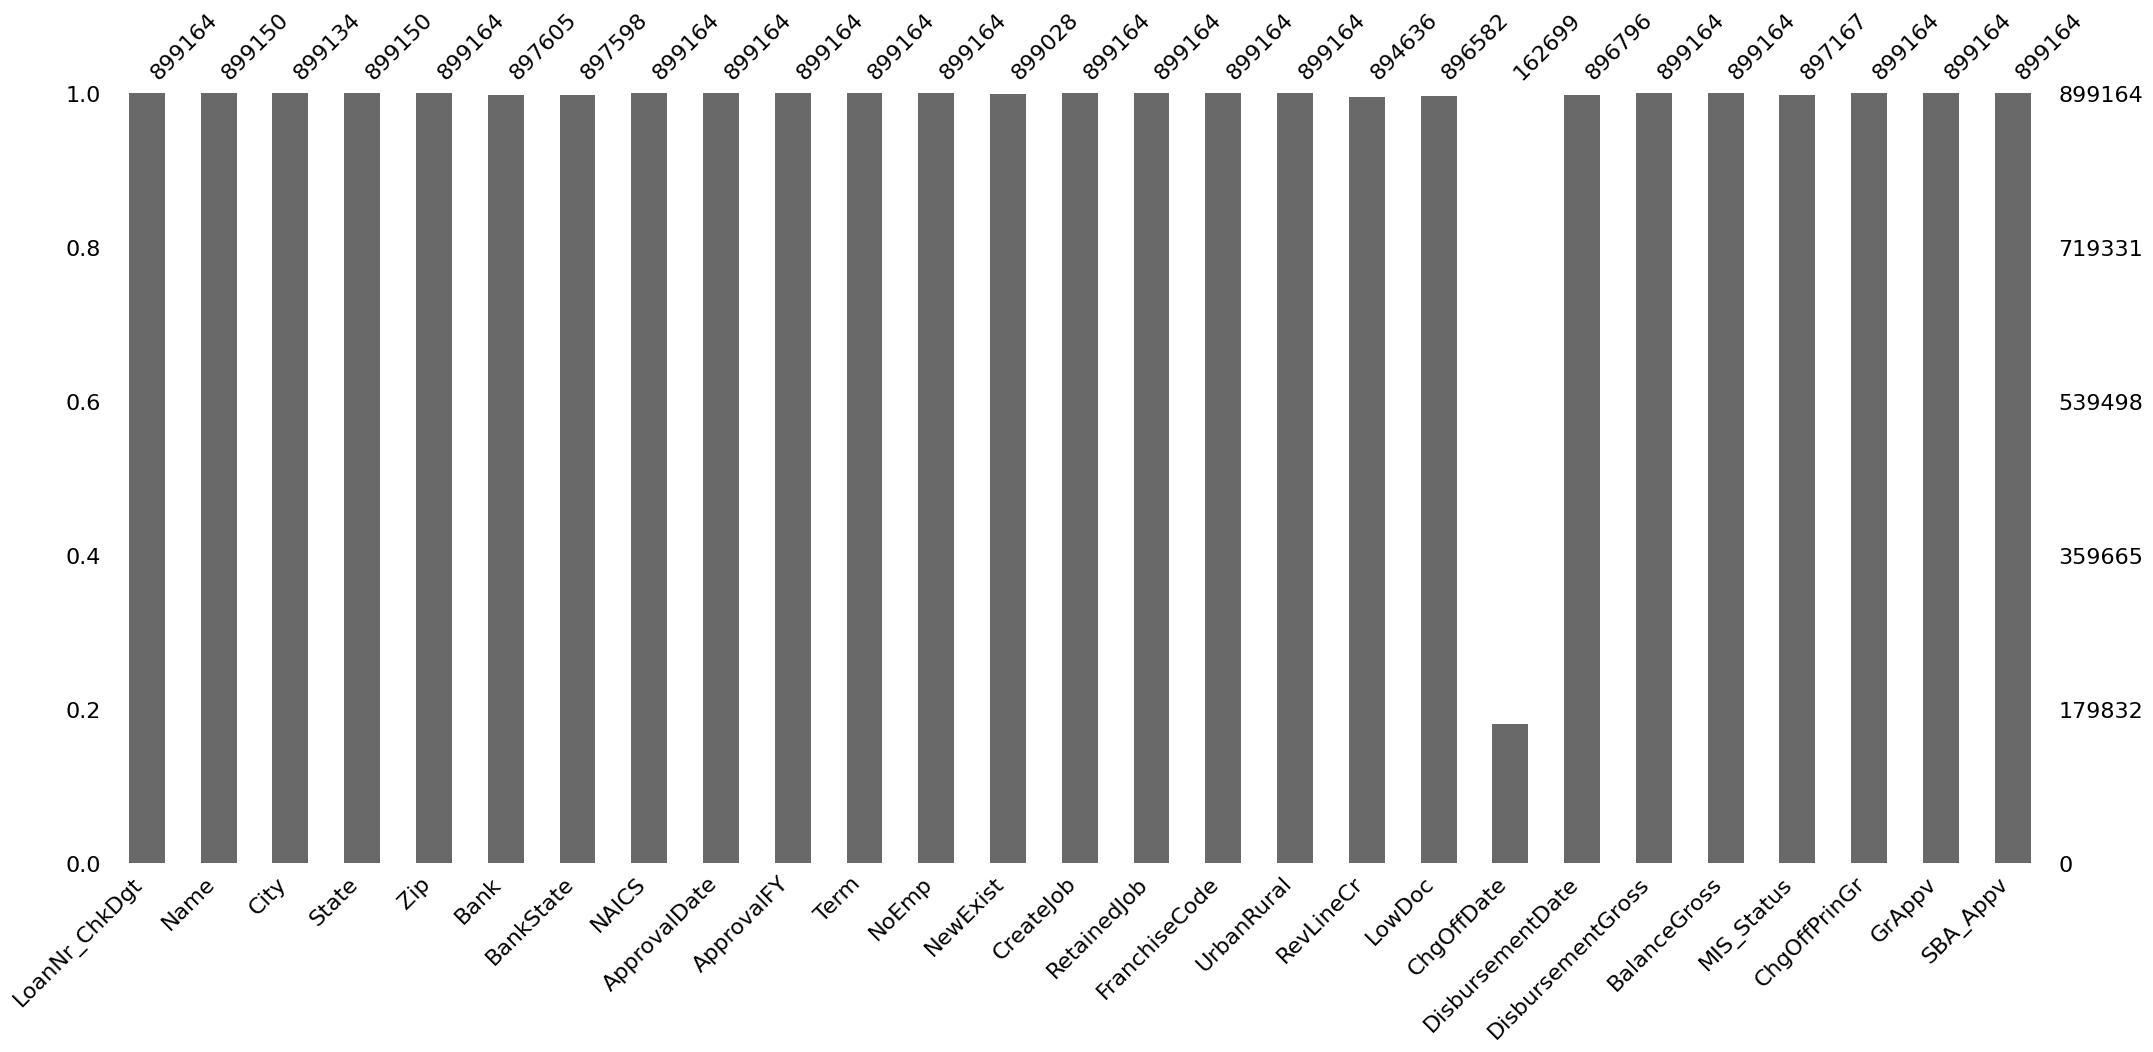

In [43]:
# visualiser les nombres de données manquantes par variable
mano.bar(data)
plt.show()


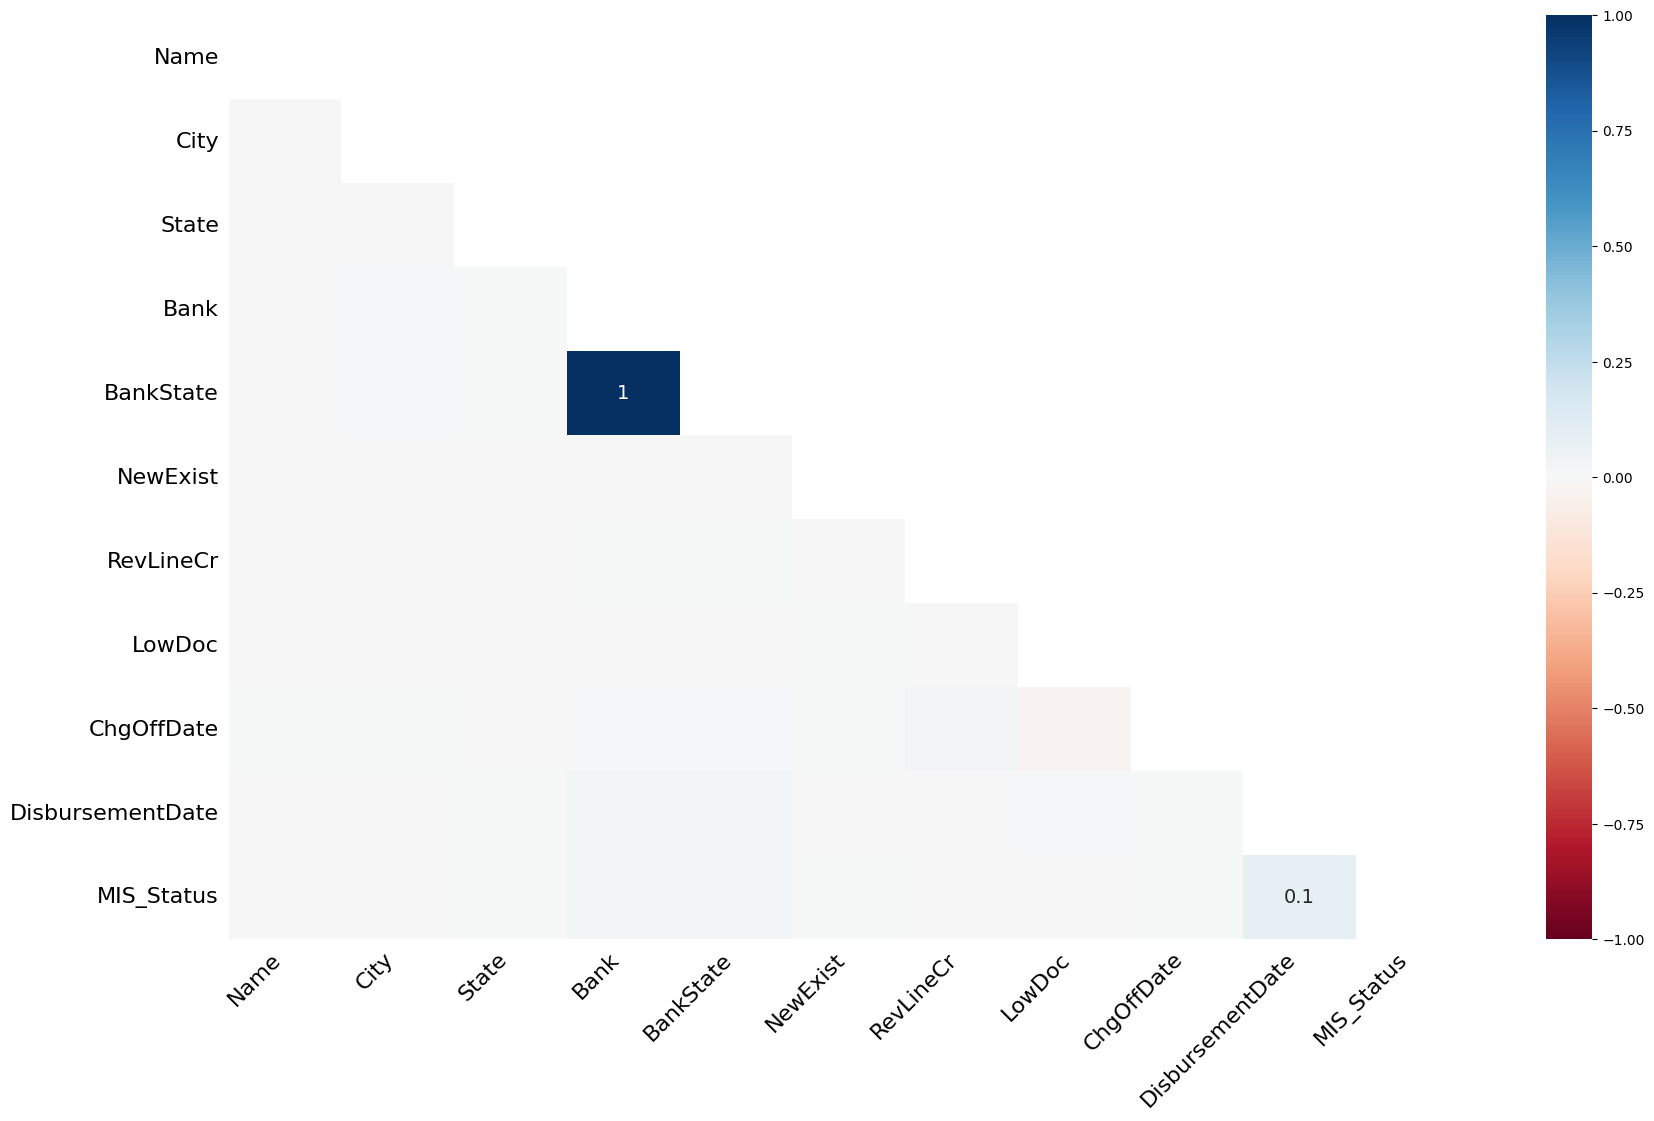

"La corrélation de nullité va de -1 (si une variable apparaît, l'autre n'apparaît absolument pas) à 0 (les variables apparaissant ou n'apparaissant pas n'ont pas d'effet l'une sur l'autre) à 1 (si une variable apparaît, l'autre apparaît absolument aussi)."

In [44]:
# la matrice de correlation heatmap de missingno mesure le lien entre l'absence d'une variable et une autre
mano.heatmap(data)
plt.show()

"""La corrélation de nullité va de -1 (si une variable apparaît, l'autre n'apparaît absolument pas) à 0 (les variables apparaissant ou n'apparaissant pas n'ont pas d'effet l'une sur l'autre) à 1 (si une variable apparaît, l'autre apparaît absolument aussi)."""

Le dendrogramme permet d'établir une corrélation plus complète entre les variables, révélant des tendances plus profondes que les tendances par paire visibles dans la carte thermique de corrélation 

<Axes: >

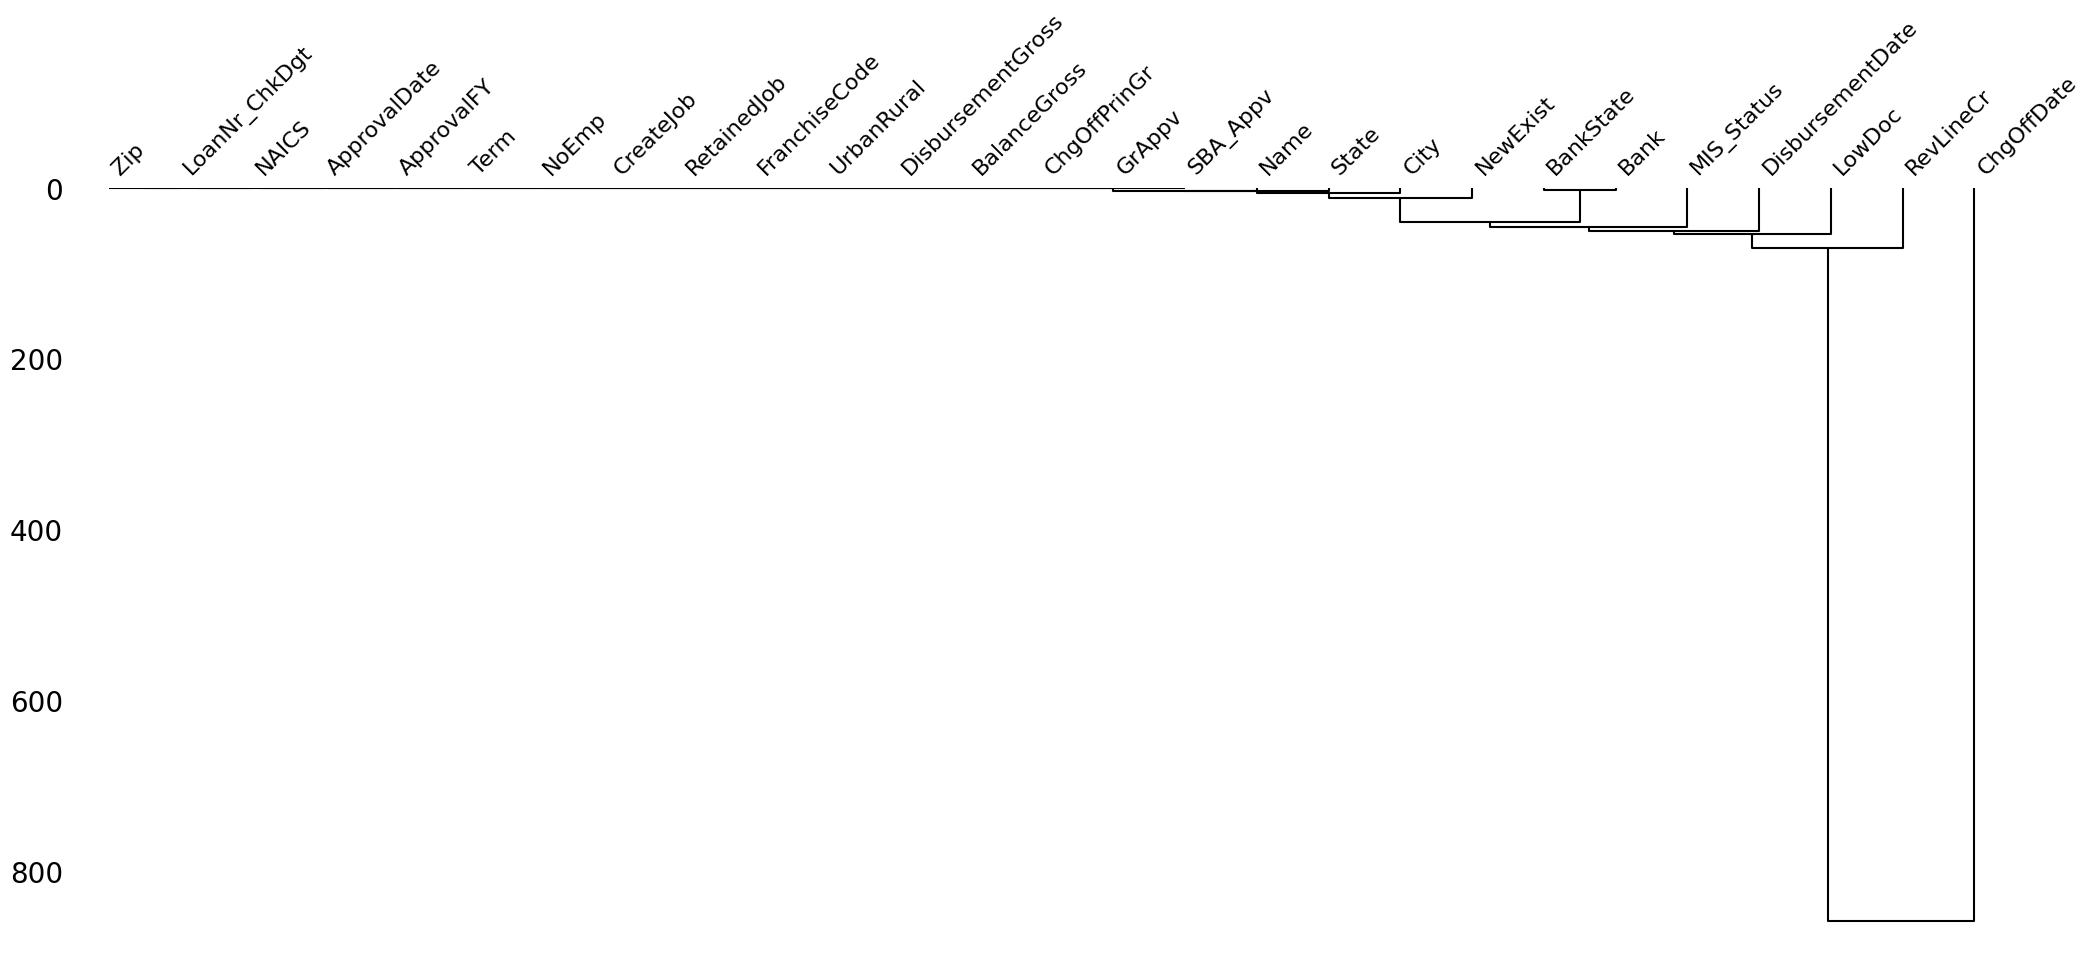

In [45]:
mano.dendrogram(data)

Pour lire le dendogramme, il faut le lire de haut en bas. Les feuilles d'un groupe qui sont reliées entre elles à une distance de zéro indiquent que la présence de l'une prédit la présence de l'autre. 


## Analysons les données

In [46]:
#supprimer la clé primaire du dataframe
data = data.drop(['LoanNr_ChkDgt'], axis=1)
data.describe(include='all')

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,899150,899134,899150,899164.000000,897605,897598,899164.000000,899164,899164.0,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000,894636,896582,162699,896796,8.991640e+05,899164.000000,897167,8.991640e+05,8.991640e+05,8.991640e+05
unique,779583,32581,51,NaN,5802,56,NaN,9859,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,8,6448,8472,NaN,NaN,2,NaN,NaN,NaN
top,SUBWAY,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,NaN,7-Jul-93,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,13-Mar-10,31-Jul-95,NaN,NaN,P I F,NaN,NaN,NaN
freq,1269,11558,130619,NaN,86853,118116,NaN,1131,76040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420288,782822,734,10371,NaN,NaN,739609,NaN,NaN,NaN
mean,NaN,NaN,NaN,53804.391241,NaN,NaN,398660.950146,NaN,NaN,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748,NaN,NaN,NaN,NaN,2.011540e+05,2.989349,NaN,1.350330e+04,1.926870e+05,1.494888e+05
std,NaN,NaN,NaN,31184.159152,NaN,NaN,263318.312760,NaN,NaN,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436,NaN,NaN,NaN,NaN,2.876408e+05,1442.161912,NaN,6.515229e+04,2.832634e+05,2.284146e+05
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,0.000000e+00,2.000000e+02,1.000000e+02
25%,NaN,NaN,NaN,27587.000000,NaN,NaN,235210.000000,NaN,NaN,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,4.200000e+04,0.000000,NaN,0.000000e+00,3.500000e+04,2.125000e+04
50%,NaN,NaN,NaN,55410.000000,NaN,NaN,445310.000000,NaN,NaN,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000e+05,0.000000,NaN,0.000000e+00,9.000000e+04,6.125000e+04
75%,NaN,NaN,NaN,83704.000000,NaN,NaN,561730.000000,NaN,NaN,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.380000e+05,0.000000,NaN,0.000000e+00,2.250000e+05,1.750000e+05


#### On va regarder les valeurs nulles présentes dans notre dataset. Selon le nombre de valeurs manquantes et leur lien avec d'autres variables éventuellement, on peut décider de les supprimer ou de les imputer. 

In [48]:
data.isnull().sum()

Name                     14
City                     30
State                    14
Zip                       0
Bank                   1558
BankState              1565
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2581
ChgOffDate           736338
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1964
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### Analyses de la target et des autres variables

In [29]:
#décompte des modalités de chaque variable
data.RevLineCr.value_counts()
data.LowDoc.value_counts()
data.BankState.value_counts()
data.SBA_Appv.value_counts()

SBA_Appv
25000.0     49579
12500.0     40147
5000.0      31135
50000.0     25047
10000.0     17009
            ...  
192949.0        1
212352.0        1
57072.0         1
32938.0         1
715674.0        1
Name: count, Length: 38326, dtype: int64

#### Analyses univariées avec sweetviz

In [ ]:
import sweetviz as sv

# sweetviz a recommandé de changer 'approvalFY' en numerique (pourquoi i don't know)
data['ApprovalFY'] = pd.to_numeric(data['ApprovalFY'], errors='coerce')

#Sweetviz ne reconnait pas la variable cible comme étant binaire catégorielle: on mappe.
data['MIS_Status_Numeric'] = data['MIS_Status'].map({'P I F': 0, 'CHGOFF': 1})

# on utilise maintenant MIS_Status_Numeric pour creer un rapport
sweet_report = sv.analyze(data, 'MIS_Status_Numeric')
sweet_report.show_html()

Le rapport sweetviz présente les corrélations entre la target et plusieurs variables:
    * 

In [54]:
#table de contingence pour 2 variables qualitative: target et NAICS

data_crosstab = pd.crosstab(data['NAICS'], 
							data['MIS_Status'], 
							margins = False) 
print(data_crosstab) 

MIS_Status  CHGOFF   P I F
NAICS                     
0            16799  184858
111110           1      31
111120           0       3
111130           0       1
111140           4      90
...            ...     ...
926140           1       5
926150           0      10
927110           1       0
928110           0       4
928120           5      27

[1312 rows x 2 columns]


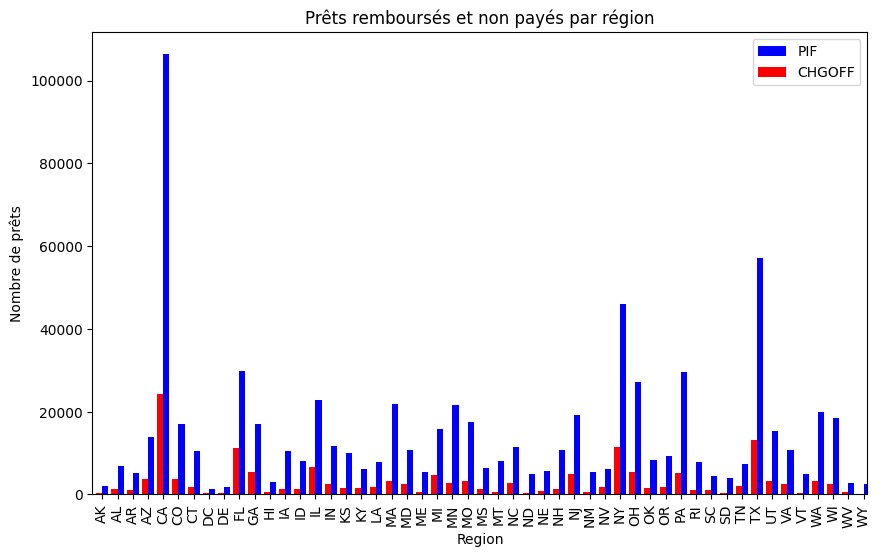

In [55]:
# filtrer les données pour PIF et CHGOFF
pif_data = data[data['MIS_Status'] == 'P I F']
chgoff_data = data[data['MIS_Status'] == 'CHGOFF']

# grouper les données/région et compter le nombre de PIF et CHGOFF
pif_counts = pif_data.groupby('State')['MIS_Status'].count()
chgoff_counts = chgoff_data.groupby('State')['MIS_Status'].count()

# graphique à barres
plt.figure(figsize=(10, 6))
pif_counts.plot(kind='bar', color='blue', position=0, width=0.4, label='PIF')
chgoff_counts.plot(kind='bar', color='red', position=1, width=0.4, label='CHGOFF')

plt.xlabel('Region')
plt.ylabel('Nombre de prêts')
plt.title('Prêts remboursés et non payés par région')
plt.legend()

plt.show()


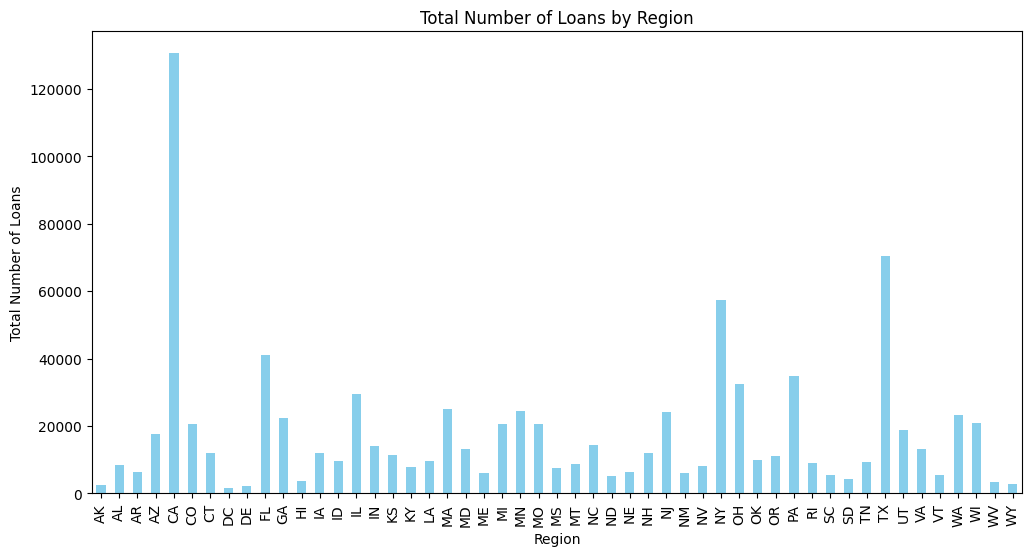

In [56]:
# grouper les données/région et compter le nombre total de prêts
total_loans_by_region = data.groupby('State')['Zip'].count()

# graphique à barres
plt.figure(figsize=(12, 6))
total_loans_by_region.plot(kind='bar', color='skyblue')

plt.xlabel('Region')
plt.ylabel('Total Number of Loans')
plt.title('Total Number of Loans by Region')

plt.show()


In [57]:
# evolution de PIF et CHGOFF en fonction de disbursement year

#data['DisbursementDate'] = data['DisbursementDate'].dt.strftime('%Y')

data['DisbursementDate'].dtype

dtype('O')

In [58]:
data.head(2)

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0


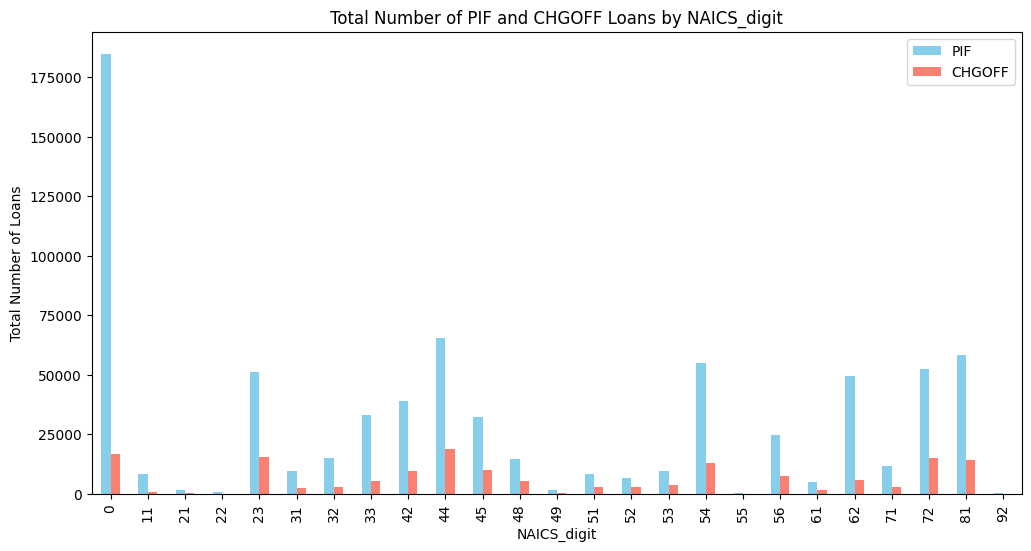

In [59]:
#nombre de prets remboursé et non remboursés pour chaque NAICS

# Créer la nouvelle colonne 'NAICS_digit'
data['NAICS_digit'] = data['NAICS'].astype(str).str[:2]

# Filtrer les données pour les prêts PIF et CHOFF
pif_data = data[data['MIS_Status'] == 'P I F']
chgoff_data = data[data['MIS_Status'] == 'CHGOFF']

# Grouper les données filtrées par 'NAICS_digit' et compter le nombre total de prêts PIF et CHOFF
pif_counts = pif_data.groupby('NAICS_digit').size()
chgoff_counts = chgoff_data.groupby('NAICS_digit').size()

# Créer un DataFrame avec les comptages PIF et CHOFF pour chaque valeur de 'NAICS_digit'
naics_counts = pd.DataFrame({'PIF': pif_counts, 'CHGOFF': chgoff_counts})

# Afficher un graphique à barres pour les comptages PIF et CHOFF par 'NAICS_digit'
naics_counts.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])

# Ajouter des étiquettes et un titre
plt.xlabel('NAICS_digit')
plt.ylabel('Total Number of Loans')
plt.title('Total Number of PIF and CHGOFF Loans by NAICS_digit')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()


In [60]:
pd.crosstab(data['State'], data['MIS_Status'])
pd.crosstab(data['City'], data['MIS_Status'])
pd.crosstab(data['State'], data['MIS_Status'])
pd.crosstab(data['UrbanRural'], data['MIS_Status'], normalize = 'columns')

data

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,NAICS_digit
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0,45
899160,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0,45
899161,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0,33
899162,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,0


In [36]:
# répartition de la target
display(data["MIS_Status"].value_counts())
display(data["MIS_Status"].value_counts(normalize=True))

MIS_Status
P I F     739515
CHGOFF    157557
Name: count, dtype: int64

MIS_Status
P I F     0.824365
CHGOFF    0.175635
Name: proportion, dtype: float64

In [61]:
# on construit un df avec MIS_Status et 'ChgOffPrinGr' 
df_mc = data[['MIS_Status', 'BalanceGross', 'DisbursementGross', 'SBA_Appv', 'GrAppv']]
df_mc

# on vérifie si il existe des lignes où MIS_Status est égal à 'P I F' et BalanceGross est supérieur à zéro
odd_rows = df_mc.loc[(df_mc['MIS_Status'] == 'P I F') & (df_mc['BalanceGross'] > 0)]

print(len(odd_rows))

#il il y a 14 lignes au total, on les supprime
odd_rows_indices = df_mc[(df_mc['MIS_Status'] == 'P I F') & (df_mc['BalanceGross'] > 0)].index

data = data.drop(index=odd_rows_indices)

# on vérifie que les lignes ont été supprimées
odd_rows_ = data.loc[(data['MIS_Status'] == 'P I F') & (data['BalanceGross'] > 0)]

print(len(odd_rows_))

14
0


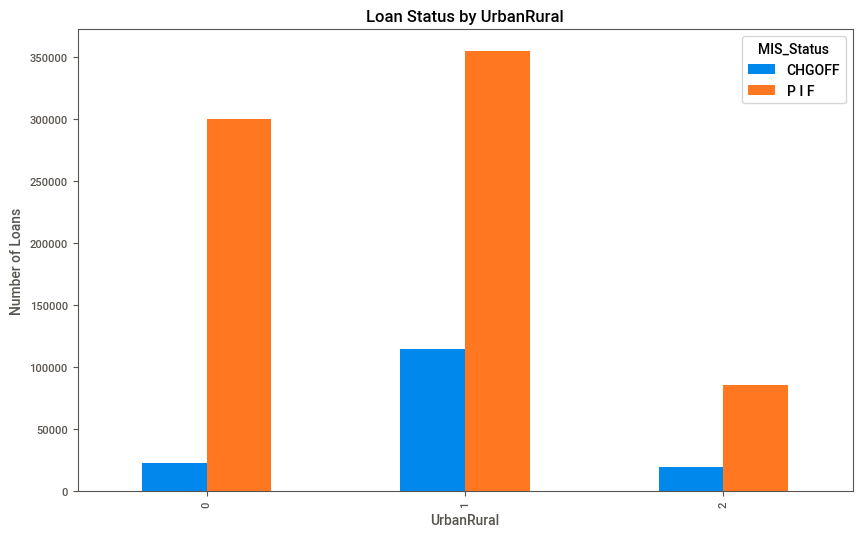

In [65]:
# Grouper les données par 'UrbanRural' et 'MIS_Status' et compter le nombre de prêts
mis_status_by_urbanrural = data.groupby(['UrbanRural', 'MIS_Status']).size().unstack()

# Créer un graphique à barres empilées
mis_status_by_urbanrural.plot(kind='bar', stacked=False, figsize=(10, 6))

# Ajouter des étiquettes et un titre
plt.xlabel('UrbanRural')
plt.ylabel('Number of Loans')
plt.title('Loan Status by UrbanRural')

# Afficher la légende
plt.legend(title='MIS_Status')

# Afficher le graphique
plt.show()


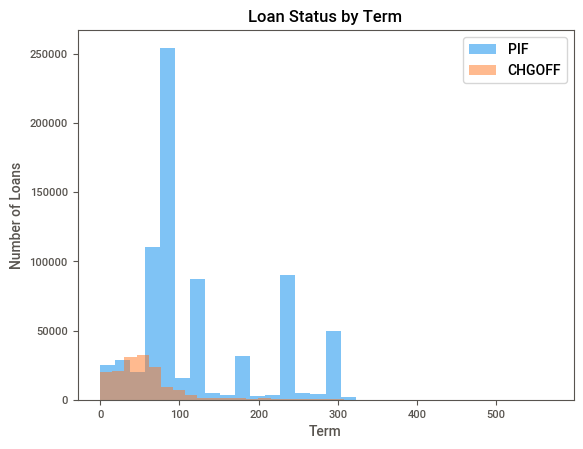

In [67]:
# Créer un histogramme pour les prêts remboursés (PIF)
plt.hist(data[data['MIS_Status'] == 'P I F']['Term'], bins=30, alpha=0.5, label='PIF')

# Créer un histogramme pour les prêts non remboursés (CHGOFF)
plt.hist(data[data['MIS_Status'] == 'CHGOFF']['Term'], bins=30, alpha=0.5, label='CHGOFF')

# Ajouter des étiquettes et un titre
plt.xlabel('Term')
plt.ylabel('Number of Loans')
plt.title('Etat du prêt ')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


In [7]:
# Répartition Urban/Rural
display(data["UrbanRural"].value_counts())
display(data["UrbanRural"].value_counts(normalize=True))

1    470654
0    323167
2    105343
Name: UrbanRural, dtype: int64

1    0.523435
0    0.359408
2    0.117157
Name: UrbanRural, dtype: float64

/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_16022/3396679933.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  term_status_counts = data.groupby(['Term_class', 'MIS_Status']).size().unstack()


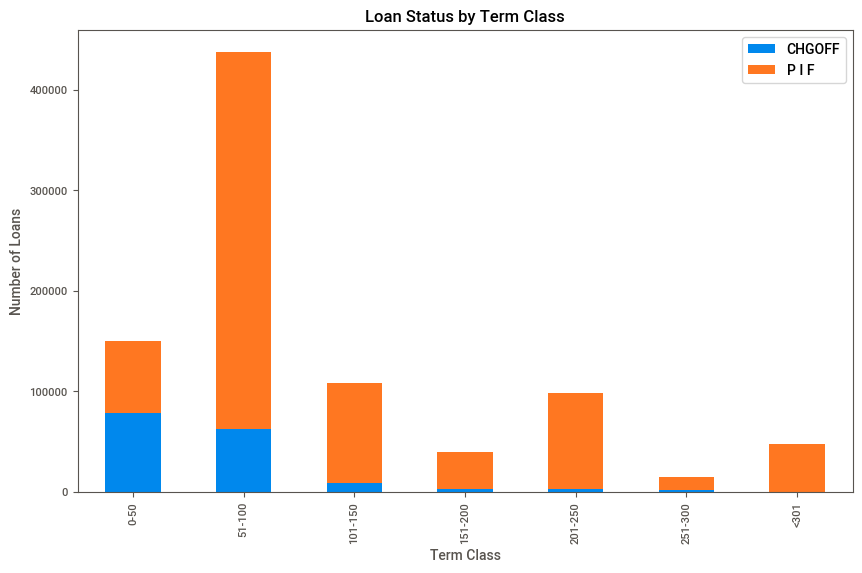

In [70]:
# Définir les classes pour la durée du prêt (par exemple, chaque intervalle de 50 mois)
bins = [0, 50, 100, 150, 200, 250, 300, float('inf')]  # Ajoutez des intervalles selon vos besoins

# Créer des étiquettes pour les classes
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '<301' ]
# Créer une nouvelle colonne 'Term_class' avec les classes
data['Term_class'] = pd.cut(data['Term'], bins=bins, labels=labels, right=False)

# Grouper les données par 'Term_class' et 'MIS_Status' et compter le nombre de prêts dans chaque groupe
term_status_counts = data.groupby(['Term_class', 'MIS_Status']).size().unstack()

# Créer un graphique à barres empilées
term_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajouter des étiquettes et un titre
plt.xlabel('Term Class')
plt.ylabel('Number of Loans')
plt.title('Loan Status by Term Class')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


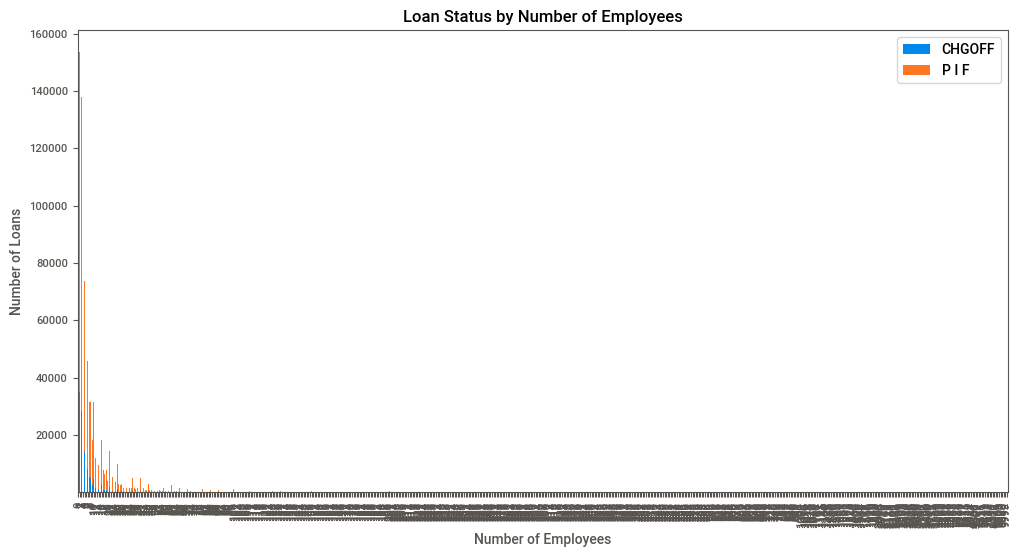

In [71]:
# Grouper les données par 'NoEmp' et 'MIS_Status' et compter le nombre de prêts dans chaque groupe
emp_status_counts = data.groupby(['NoEmp', 'MIS_Status']).size().unstack()

# Créer un graphique à barres empilées
emp_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Ajouter des étiquettes et un titre
plt.xlabel('Number of Employees')
plt.ylabel('Number of Loans')
plt.title('Loan Status by Number of Employees')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_16022/2583601741.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_status_counts = data.groupby(['NoEmp_class', 'MIS_Status']).size().unstack()


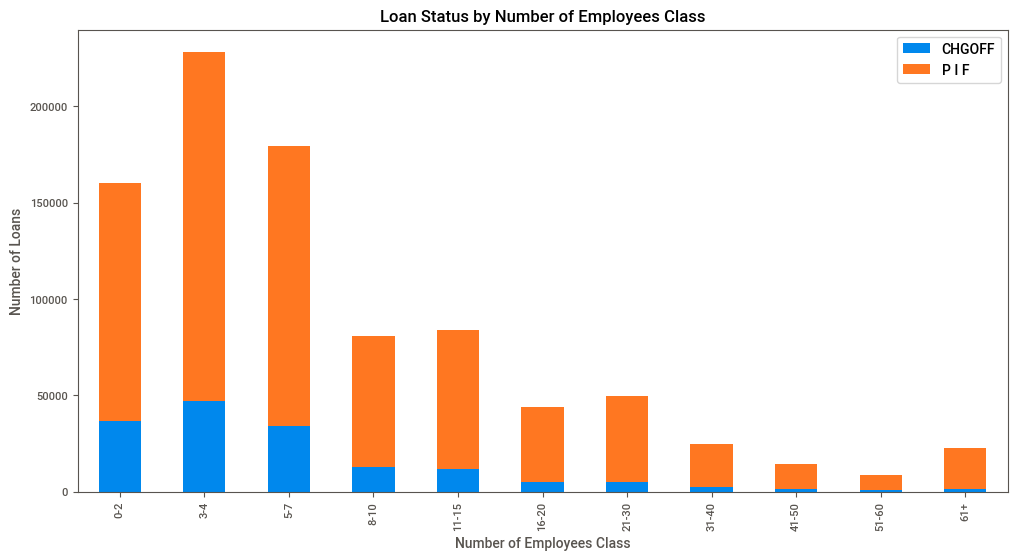

In [72]:
# Définir les classes pour le nombre d'employés
bins = [0, 2, 4, 7, 10, 15, 20, 30, 40, 50, 60, 9999]  # Ajouter une classe pour les entreprises de plus de 60 employés

# Créer des étiquettes pour les classes
labels = ['0-2', '3-4', '5-7', '8-10', '11-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Créer une nouvelle colonne 'NoEmp_class' avec les classes
data['NoEmp_class'] = pd.cut(data['NoEmp'], bins=bins, labels=labels, right=False)

# Grouper les données par 'NoEmp_class' et 'MIS_Status' et compter le nombre de prêts dans chaque groupe
emp_status_counts = data.groupby(['NoEmp_class', 'MIS_Status']).size().unstack()

# Créer un graphique à barres empilées
emp_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Ajouter des étiquettes et un titre
plt.xlabel('Number of Employees Class')
plt.ylabel('Number of Loans')
plt.title('Loan Status by Number of Employees Class')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


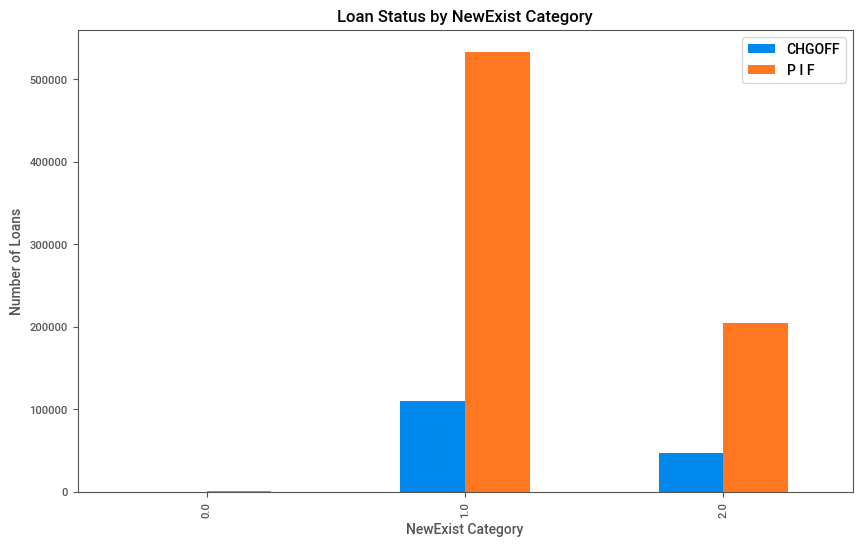

In [74]:
# Grouper les données par 'NewExist' et 'MIS_Status' et compter le nombre de prêts dans chaque groupe
#1 = Existing business, 2 = New business		
newexist_status_counts = data.groupby(['NewExist', 'MIS_Status']).size().unstack()

# Créer un graphique à barres empilées
newexist_status_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

# Ajouter des étiquettes et un titre
plt.xlabel('NewExist Category')
plt.ylabel('Number of Loans')
plt.title('Loan Status by NewExist Category')

plt.legend()

plt.show()


/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_16022/3991391080.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  createjob_status_counts = data.groupby(['CreateJob_bins', 'MIS_Status']).size().unstack()


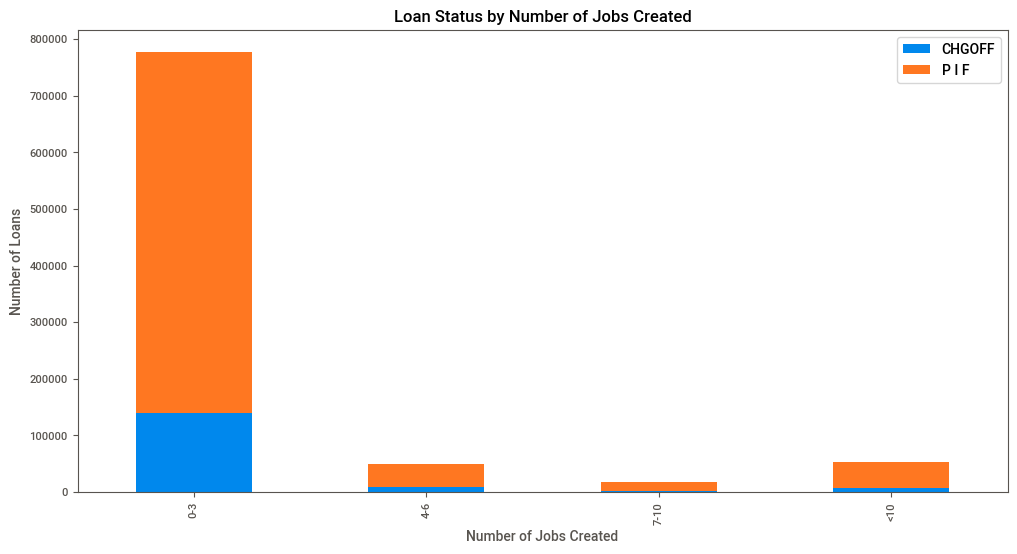

In [80]:
# Créer des bins pour la variable 'CreateJob'
bins = [0, 4, 7, 10, float('inf')]  # Bins pour les valeurs de 0 à 5, de 6 à 10, et supérieures à 10

# Discrétiser la variable 'CreateJob' en utilisant les bins définis
data['CreateJob_bins'] = pd.cut(data['CreateJob'], bins=bins, labels=['0-3', '4-6', '7-10', '<10'], right=False)

# Grouper les données par 'CreateJob_bins' et 'MIS_Status' et compter le nombre de prêts dans chaque groupe
createjob_status_counts = data.groupby(['CreateJob_bins', 'MIS_Status']).size().unstack()

# Créer un graphique à barres empilées
createjob_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Ajouter des étiquettes et un titre
plt.xlabel('Number of Jobs Created')
plt.ylabel('Number of Loans')
plt.title('Loan Status by Number of Jobs Created')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()



### Nettoyage

In [38]:

#je crée un nouveau dataframe qui ne contient pas les colonnes 'dataleaking' ni les colonnes inutiles du type 

data = pd.read_csv('SBAnational.csv')
data.columns


/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_13814/3166364538.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('SBAnational.csv')


Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [63]:
data_lite = data.drop(['BalanceGross', 'NoEmp', 'Name', 'Zip', 'City', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BankState', 'Bank', 'State', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'CreateJob', 'RetainedJob'], axis=1)
data_lite

,NAICS,ApprovalDate,ApprovalFY,Term,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,NAICS_digit
0,451120,28-Feb-97,1997,84,2.0,1,0,N,Y,P I F,45
1,722410,28-Feb-97,1997,60,2.0,1,0,N,Y,P I F,72
2,621210,28-Feb-97,1997,180,1.0,1,0,N,N,P I F,62
3,0,28-Feb-97,1997,60,1.0,1,0,N,Y,P I F,0
4,0,28-Feb-97,1997,240,1.0,1,0,N,N,P I F,0
...,...,...,...,...,...,...,...,...,...,...,...
899159,451120,27-Feb-97,1997,60,1.0,1,0,0,N,P I F,45
899160,451130,27-Feb-97,1997,60,1.0,1,0,Y,N,P I F,45
899161,332321,27-Feb-97,1997,108,1.0,1,0,N,N,P I F,33
899162,0,27-Feb-97,1997,60,1.0,1,0,N,Y,CHGOFF,0


In [182]:
print(data_lite.isnull().sum())

data_lite.dtypes

# data_lite['RevLineCr'].unique()
# data_lite['Term'].unique()
# data_lite['NewExist'].unique()
# data_lite['FranchiseCode'].unique()
# data_lite['UrbanRural'].unique()
# data_lite['RevLineCr'].unique()
# data_lite['LowDoc'].unique()

NAICS                     0
ApprovalFY                0
Term                      0
NewExist                136
FranchiseCode             0
UrbanRural                0
RevLineCr            277479
LowDoc                 6007
MIS_Status             1997
ApprovalDate_Year         0
dtype: int64


array(['Y', 'N', nan], dtype=object)

In [165]:
data_lite.NAICS.nunique()
data_lite.Term.nunique()
data_lite.ApprovalDate.nunique()

data_lite.head(10)

,NAICS,ApprovalDate,ApprovalFY,Term,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
0,451120,28-Feb-97,1997,84,2.0,1,0,N,Y,P I F
1,722410,28-Feb-97,1997,60,2.0,1,0,N,Y,P I F
2,621210,28-Feb-97,1997,180,1.0,1,0,N,N,P I F
3,0,28-Feb-97,1997,60,1.0,1,0,N,Y,P I F
4,0,28-Feb-97,1997,240,1.0,1,0,N,N,P I F
5,332721,28-Feb-97,1997,120,1.0,1,0,N,N,P I F
6,0,2-Jun-80,1980,45,2.0,0,0,N,N,CHGOFF
7,811118,28-Feb-97,1997,84,2.0,1,0,N,Y,P I F
8,721310,28-Feb-97,1997,297,2.0,1,0,N,N,P I F
9,0,28-Feb-97,1997,84,2.0,1,0,N,Y,P I F


In [166]:
#pour la colonne ApprovalDate, on va réduire les modalités en ne considérant que l'année
# d'abord transformer la date en Y-M-D

data_lite['ApprovalDate'] = pd.to_datetime(data_lite['ApprovalDate'], format='%d-%b-%y', errors='coerce')
data_lite['ApprovalDate_Year'] = data_lite['ApprovalDate'].dt.year
data_lite = data_lite.drop('ApprovalDate', axis=1)

#On verifie que les colonnes 'ApprovalDateYear' et 'ApprovalFY' sont identiques
data_lite['ApprovalDate_Year'].equals(data_lite['ApprovalFY'])

False

On constate des valeurs manquantes dans les variables 'ApprovalFY', 'NewExist', 'RevLineCr', 'LowDoc'. 

Les valeurs uniques des variables catégorielles sont trop larges, un encodage du type one-hot risque de faire exploser la dimensionnalité du dataset.

#### Premier modéle: RandomForest

In [64]:
# Modéle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [67]:
#compter toutes les lignes avec une valeur manquante au moins

nombre_lignes_manquantes = data_lite[data_lite.isna().any(axis=1)].shape[0]

# Afficher le résultat
print(f"Nombre de lignes avec au moins une valeur manquante : {nombre_lignes_manquantes}")


# supprimer les lignes avec données manquantes
data_lite = data_lite.dropna()
print(f"Nombre de lignes avec au moins une valeur manquante : {nombre_lignes_manquantes}")


Nombre de lignes avec au moins une valeur manquante : 0
Nombre de lignes avec au moins une valeur manquante : 0


In [68]:
#pour la colonne ApprovalDate, on va réduire les modalités en ne considérant que l'année
# d'abord transformer la date en Y-M-D

data_lite['ApprovalDate'] = pd.to_datetime(data_lite['ApprovalDate'], format='%d-%b-%y', errors='coerce')
data_lite['ApprovalDate_Year'] = data_lite['ApprovalDate'].dt.year
data_lite = data_lite.drop('ApprovalDate', axis=1)

#On verifie que les colonnes 'ApprovalDateYear' et 'ApprovalFY' sont identiques
data_lite['ApprovalDate_Year'].equals(data_lite['ApprovalFY'])

False

In [69]:
display(data_lite)

data_lite.dtypes

,NAICS,ApprovalFY,Term,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,NAICS_digit,ApprovalDate_Year
0,451120,1997,84,2.0,1,0,N,Y,P I F,45,1997
1,722410,1997,60,2.0,1,0,N,Y,P I F,72,1997
2,621210,1997,180,1.0,1,0,N,N,P I F,62,1997
3,0,1997,60,1.0,1,0,N,Y,P I F,0,1997
4,0,1997,240,1.0,1,0,N,N,P I F,0,1997
...,...,...,...,...,...,...,...,...,...,...,...
899159,451120,1997,60,1.0,1,0,0,N,P I F,45,1997
899160,451130,1997,60,1.0,1,0,Y,N,P I F,45,1997
899161,332321,1997,108,1.0,1,0,N,N,P I F,33,1997
899162,0,1997,60,1.0,1,0,N,Y,CHGOFF,0,1997


NAICS                  int64
ApprovalFY            object
Term                   int64
NewExist             float64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
MIS_Status            object
NAICS_digit           object
ApprovalDate_Year      int32
dtype: object

In [70]:
data_lite.LowDoc.unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [71]:
row_index = data_lite[data_lite['ApprovalFY'] == '1976A'].index
print(data_lite.loc[row_index])

#remplace 1976A par 1976
data_lite['ApprovalFY'] = data_lite['ApprovalFY'].replace('1976A', '1976')

#on verifie que ApprovaFY et ApprovalDate_Year sont identiques
data_lite['ApprovalDate_Year'].equals(data_lite['ApprovalFY'])

row_index = data_lite[data_lite['ApprovalFY'] == '1976A'].index
print(data_lite.loc[row_index])


        NAICS ApprovalFY  Term  NewExist  FranchiseCode  UrbanRural RevLineCr  \
699732      0      1976A   120       1.0              0           0         N   
704030      0      1976A   120       1.0              0           0         N   
705375      0      1976A   120       2.0              0           0         N   
710381      0      1976A    60       2.0              0           0         N   
713245      0      1976A    84       1.0              0           0         N   
748029      0      1976A   102       1.0              0           0         N   
751519      0      1976A   120       2.0              0           0         N   
769515      0      1976A   240       2.0              0           0         N   
775002      0      1976A    84       1.0              0           0         N   
775430      0      1976A   120       1.0              0           0         N   
775978      0      1976A   240       1.0              0           0         N   
776367      0      1976A    

In [72]:
#nettoyer le dataset

#colonne RevLineCr contient des valeurs 'y', 'n' et des valeurs bizarres
#47% des valeurs de cette variables sont egales à 'n', on pourrait remplacer les valeurs bizarres par un 'n'

valeurs_odd = [ 'NaN', 'nan','0', 'T','`', ',', '1', 'C', '3', '2', 'R', '7','A', '5', '.', '4', '-', 'Q']
data_lite['RevLineCr'] = data_lite['RevLineCr'].replace(valeurs_odd, np.nan)
data_lite['RevLineCr'].unique()

array(['N', nan, 'Y'], dtype=object)

In [73]:
import numpy as np

# Liste des valeurs indésirables
valeurs_bizarres = ['C', '1', 'nan', 'S', 'R', 'A', '0']

# Remplacer les valeurs indésirables par np.nan et sauvegarder les modifications
data_lite['LowDoc'] = data_lite['LowDoc'].replace(valeurs_bizarres, np.nan)

# Afficher les valeurs uniques après le remplacement
valeurs_uniques = data_lite['LowDoc'].unique()
print(valeurs_uniques)

data_lite['LowDoc']

['Y' 'N' nan]


0         Y
1         Y
2         N
3         Y
4         N
         ..
899159    N
899160    N
899161    N
899162    Y
899163    N
Name: LowDoc, Length: 889830, dtype: object

In [74]:
#decompte des valeurs nan de la feature 'RevLineCr'ArithmeticError
revline_null = data_lite['RevLineCr'].isna().sum()

revline_null  #=> 277479 valeurs nulles !

272661

In [176]:
#decompte des valeurs nan de LowDoc
lowdoc_null = data_lite['LowDoc'].isna().sum()
lowdoc_null

6007

In [ ]:
#supprime les lignes qui ne sont ni 'y' ni 'n' dans 'RevLineCr'ArithmeticError
valeurs_valides = ['y', 'n']

# Filtrer le DataFrame pour ne conserver que les lignes avec des valeurs 'y' ou 'n'
data_lite = data_lite[data_lite['RevLineCr'].isin(valeurs_valides)]
data_lite

,NAICS,ApprovalFY,Term,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status,ApprovalDate_Year


In [75]:
## TEST RAMDOFOREST SUR TOUT LE DATASET

data_lite

,NAICS,ApprovalFY,Term,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,NAICS_digit,ApprovalDate_Year
0,451120,1997,84,2.0,1,0,N,Y,P I F,45,1997
1,722410,1997,60,2.0,1,0,N,Y,P I F,72,1997
2,621210,1997,180,1.0,1,0,N,N,P I F,62,1997
3,0,1997,60,1.0,1,0,N,Y,P I F,0,1997
4,0,1997,240,1.0,1,0,N,N,P I F,0,1997
...,...,...,...,...,...,...,...,...,...,...,...
899159,451120,1997,60,1.0,1,0,NaN,N,P I F,45,1997
899160,451130,1997,60,1.0,1,0,Y,N,P I F,45,1997
899161,332321,1997,108,1.0,1,0,N,N,P I F,33,1997
899162,0,1997,60,1.0,1,0,N,Y,CHGOFF,0,1997
